# Intro to Python: Exercise 4

## Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

Read the data from the CSV file using Panda library

In [6]:
path = os.getcwd() + '\\data\\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot it to get a better idea of what the data looks like.

<AxesSubplot:xlabel='Population', ylabel='Profit'>

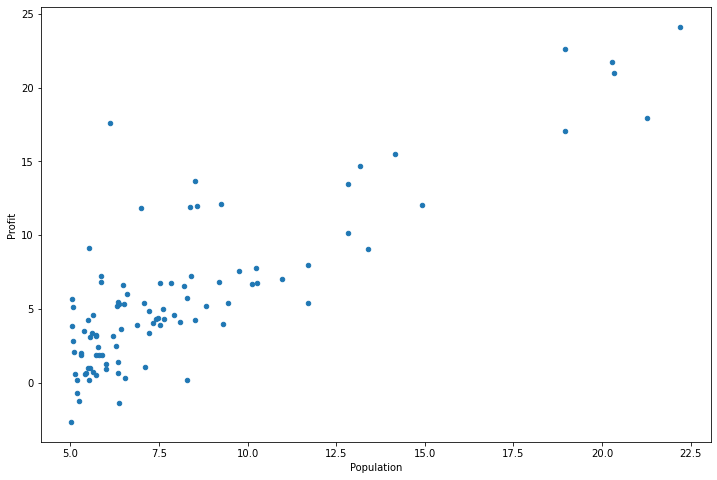

In [8]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta). The cost function is the Mean Sqaured error in matrix form: 

$$ MSE(\theta) = \frac{1}{N}\sum_n^N [ y_n-x_n^T*\theta]^2 $$

where $\theta$ and $x_n$ are vectors

__Hint__: Use the matrix form of the cost function and make use of numpy operations.

In [18]:
def computeCost(x, y, theta):
    # Compute the cost function
    N = x.shape[0]
    return 1/N*sum((y - x@theta)**2)

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [11]:
data.insert(0, 'Ones', 1)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Now let's do some variable initialization.

In [12]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [13]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [14]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Convert X and Y to numpy array for better manipulation. Initiliaze Theta.

In [15]:
X = np.array(X.values)
y = np.array(y.values).flatten()
theta = np.array([0,0])
theta

array([0, 0])

Let's take a quick look at the shape of our matrices.

In [16]:
X.shape, theta.shape, y.shape

((97, 2), (2,), (97,))

Now let's compute the cost for our initial solution (0 values for theta).

In [19]:
computeCost(X, y, theta)

64.14546775491131

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules. Write first a function that computes the gradient of a matrix and then use it in the gradientDescent function.

The gradient descent formula is:

$$\theta^{t+1} = \theta^{t} - \alpha*\nabla MSE(\theta^{t})$$

where $\nabla MSE(\theta^{t})$ is the gradient of the cost function at $\theta^{t}$

__Hint__: Use the matrix form of the gradient and make use of numpy operations.

In [44]:
def compute_gradient(y, X, w): # X au lieu de tx jsp ce que leur tx représente, on va dire que w c theta
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    N = y.shape[0]
    grad = -2/N * np.array([sum((y - X@w)*X[:,0]), sum((y - X@w)*X[:,1])])
    # grad = 2/N * X.T@(X@w - y) -> better chatGPT version
    loss = computeCost(X,y,w) # loss = cost
    # ***************************************************
    return grad, loss

In [46]:
def gradientDescent(X, y, theta, alpha,max_iters):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [theta]
    cost = np.zeros(max_iters)
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        grad, loss = compute_gradient(y,X,theta)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        theta = theta - alpha * grad # element-wise mutliplication here
        # ***************************************************
        # store w and loss
        ws.append(theta)
        cost[n_iter] = loss
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=theta[0], w1=theta[1]))

    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [47]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [48]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

Gradient Descent(0/999): loss=64.14546775491131, w0=0.1167827010309278, w1=1.3065769949111345
Gradient Descent(1/999): loss=33.53928474333497, w0=0.018001608779719583, w1=0.4668851404174774
Gradient Descent(2/999): loss=20.81515950353795, w0=0.058230490259482376, w1=1.0103985192819032
Gradient Descent(3/999): loss=15.51836696060469, w0=0.008955584732491098, w1=0.6624640652822504
Gradient Descent(4/999): loss=13.3065750692935, w0=0.017447688470966963, w1=0.8890358067492414
Gradient Descent(5/999): loss=12.376211646075983, w0=-0.011205651785773731, w1=0.7453450091050499
Gradient Descent(6/999): loss=11.978169038728405, w0=-0.01583616182503814, w1=0.840270271487082
Gradient Descent(7/999): loss=11.801307545851571, w0=-0.03586548478321538, w1=0.7814054019591586
Gradient Descent(8/999): loss=11.716395840326456, w0=-0.04588771003475009, w1=0.8216458872863021
Gradient Descent(9/999): loss=11.669757570402808, w0=-0.0622765770247026, w1=0.7980072763515389
Gradient Descent(10/999): loss=11.63909

array([-3.78841926,  1.18224801])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [49]:
computeCost(X, y, g)

8.956041486642254

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

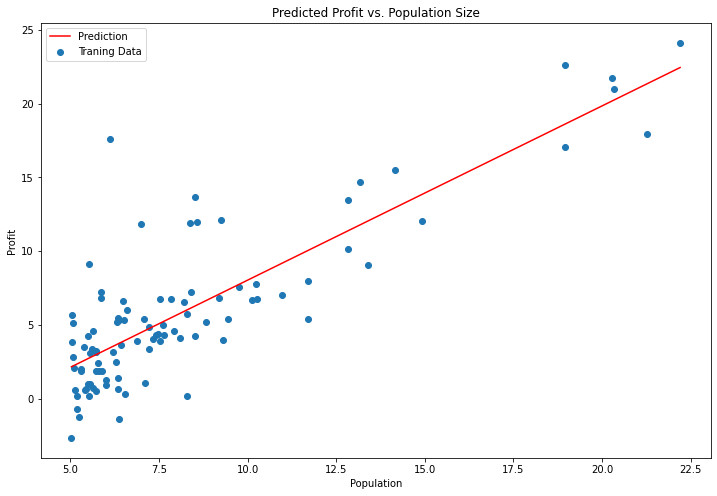

In [50]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0] + (g[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

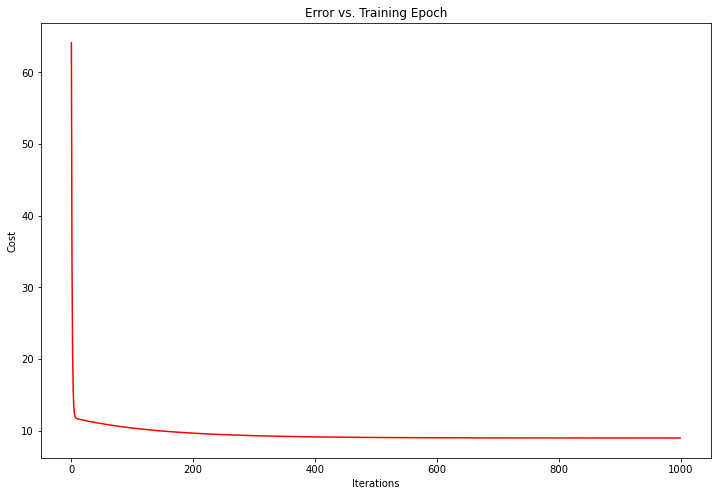

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')